Define Problem Statement and perform Exploratory Data Analysis

* The main challenge Ola faces is churn rate of its drivers. Ensuring driver loyalty and reducing attrition are crucial to the company's operation.
* Analyzing driver data can reveal patterns in driver behavior, performance, and satisfaction. This would help in foreseeing potential churn, allowing proactive measures.
* The main aim is to predict potential driver churn using multiple attributes to maintain a consistent driver base and ensure business continuity.


In [1]:
import pandas as pd 
pd.set_option("display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/ola_driver_scaler.csv")
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
df.columns[0]

'Unnamed: 0'

In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
df.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [6]:
df.describe(include="all")

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


In [7]:
df.shape

(19104, 13)

In [8]:
df["LastWorkingDate"].isnull().sum()

17488

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [10]:
df["MMM-YY"].value_counts()

MMM-YY
01/01/19    1022
02/01/19     944
03/01/19     870
12/01/20     819
10/01/20     818
08/01/20     812
09/01/20     809
07/01/20     806
11/01/20     805
12/01/19     795
04/01/19     794
01/01/20     782
11/01/19     781
06/01/20     770
05/01/20     766
05/01/19     764
09/01/19     762
02/01/20     761
07/01/19     757
08/01/19     754
10/01/19     739
04/01/20     729
06/01/19     726
03/01/20     719
Name: count, dtype: int64

In [11]:
df["Dateofjoining"].value_counts()

Dateofjoining
23/07/15    192
31/07/20    150
07/04/19    146
25/04/16    134
21/10/18    118
           ... 
16/12/18      1
23/07/18      1
29/08/18      1
25/12/20      1
16/03/18      1
Name: count, Length: 869, dtype: int64

In [12]:
df[df["Driver_ID"]==26]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
138,01/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,243110,4
139,02/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,646330,4
140,03/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,17651940,4
141,04/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,242510,4
142,05/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,1098080,4
143,06/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,1212720,4
144,07/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,2695910,4
145,08/01/19,26,41.0,0.0,C14,2,121529,05/07/18,NaN,1,3,494710,4
146,09/01/19,26,42.0,0.0,C14,2,121529,05/07/18,NaN,1,3,986540,4
147,10/01/19,26,42.0,0.0,C14,2,121529,05/07/18,NaN,1,3,9950710,4


* From above table we understand the categorization of information specific to each Driver's ID.
* Example it can have multiple Age, Income, Grade, Rating, etc.

In [13]:
df[df["Driver_ID"]==81]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
565,01/01/19,81,38.0,0.0,C9,2,77177,06/12/18,NaN,1,2,259940,2
566,02/01/19,81,38.0,0.0,C9,2,77177,06/12/18,NaN,1,2,750520,2
567,03/01/19,81,38.0,0.0,C9,2,77177,06/12/18,NaN,1,2,725300,2
568,04/01/19,81,38.0,0.0,C9,2,77177,06/12/18,NaN,1,2,569810,2
569,05/01/19,81,38.0,0.0,C9,2,77177,06/12/18,NaN,1,2,120080,2
570,06/01/19,81,38.0,0.0,C9,2,77177,06/12/18,NaN,1,2,145300,2
571,07/01/19,81,38.0,0.0,C9,2,77177,06/12/18,NaN,1,2,176120,1
572,08/01/19,81,39.0,0.0,C9,2,77177,06/12/18,NaN,1,2,145620,1
573,09/01/19,81,39.0,0.0,C9,2,77177,06/12/18,NaN,1,2,240990,1
574,10/01/19,81,39.0,0.0,C9,2,77177,06/12/18,10/04/19,1,2,0,1


In [14]:
df["Joining Designation"].value_counts()

Joining Designation
1    9831
2    5955
3    2847
4     341
5     130
Name: count, dtype: int64

In [15]:
df[df["Joining Designation"]==5][:10]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
1036,01/01/19,153,37.0,1.0,C22,1,148588,14/10/18,NaN,5,5,0,1
1037,02/01/19,153,37.0,1.0,C22,1,148588,14/10/18,NaN,5,5,0,1
1038,03/01/19,153,37.0,1.0,C22,1,148588,14/10/18,NaN,5,5,0,1
1039,04/01/19,153,37.0,1.0,C22,1,148588,14/10/18,NaN,5,5,0,1
1040,05/01/19,153,37.0,1.0,C22,1,148588,14/10/18,NaN,5,5,0,1
1041,06/01/19,153,37.0,1.0,C22,1,148588,14/10/18,NaN,5,5,0,1
1042,07/01/19,153,37.0,1.0,C22,1,148588,14/10/18,NaN,5,5,1156400,2
1043,08/01/19,153,37.0,1.0,C22,1,148588,14/10/18,NaN,5,5,0,2
1044,09/01/19,153,37.0,1.0,C22,1,148588,14/10/18,NaN,5,5,200000,2
1045,10/01/19,153,37.0,1.0,C22,1,148588,14/10/18,NaN,5,5,116400,1


In [16]:
df[df["Joining Designation"]==5][100:110]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
14164,10/01/20,2110,38.0,0.0,C19,0,131847,21/01/16,NaN,5,5,948000,1
14165,11/01/20,2110,38.0,0.0,C19,0,131847,21/01/16,NaN,5,5,560730,1
14166,12/01/20,2110,38.0,0.0,C19,0,131847,21/01/16,NaN,5,5,719650,1
14404,01/01/19,2154,40.0,0.0,C25,2,153766,01/03/16,NaN,5,5,0,1
14405,02/01/19,2154,40.0,0.0,C25,2,153766,01/03/16,NaN,5,5,0,1
14406,03/01/19,2154,40.0,0.0,C25,2,153766,01/03/16,NaN,5,5,0,1
14407,04/01/19,2154,40.0,0.0,C25,2,153766,01/03/16,NaN,5,5,0,1
14408,05/01/19,2154,40.0,0.0,C25,2,153766,01/03/16,NaN,5,5,0,1
14409,06/01/19,2154,40.0,0.0,C25,2,153766,01/03/16,NaN,5,5,0,1
14410,07/01/19,2154,40.0,0.0,C25,2,153766,01/03/16,NaN,5,5,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [18]:
df["joining date"] = pd.to_numeric(df["Dateofjoining"].apply(lambda x: x.split("/")[0]))
df["joining month"] = pd.to_numeric(df["Dateofjoining"].apply(lambda x: x.split("/")[1]))
df["joining year"] = pd.to_numeric(df["Dateofjoining"].apply(lambda x: x.split("/")[2]))

In [19]:
df["Gender"] = df["Gender"].astype(object)
df["Education_Level"] = df["Education_Level"].astype(object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  object 
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  object 
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
 13  joining date          19104 non-null  int64  
 14  joining month         19104 non-null  int64  
 15  joining year       

In [21]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining date,joining month,joining year
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,24,12,18
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,24,12,18
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,24,12,18
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,11,6,20
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,11,6,20


In [22]:
df.shape

(19104, 16)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  object 
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  object 
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
 13  joining date          19104 non-null  int64  
 14  joining month         19104 non-null  int64  
 15  joining year       

In [24]:
df['Age'] = df.groupby('Driver_ID')['Age'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [25]:
df['Gender'] = df.groupby('Driver_ID')['Gender'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19104 non-null  float64
 3   Gender                19104 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  object 
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
 13  joining date          19104 non-null  int64  
 14  joining month         19104 non-null  int64  
 15  joining year       

Missing Value Treatment
* Remove missing values present in Data received for OLA business case.

In [26]:
df.shape

(19104, 16)

In [27]:
df["Driver_ID"].nunique()

2381

In [28]:
df["Driver_ID"].value_counts()

Driver_ID
26      24
25      24
2784    24
2740    24
1077    24
        ..
2023     1
2030     1
1027     1
1029     1
1030     1
Name: count, Length: 2381, dtype: int64

In [29]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining date,joining month,joining year
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,24,12,18
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,24,12,18
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,24,12,18
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,11,6,20
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,11,6,20


In [30]:
df.describe(include="object")

,MMM-YY,City,Education_Level,Dateofjoining,LastWorkingDate
count,19104,19104,19104,19104,1616
unique,24,29,3,869,493
top,01/01/19,C20,1,23/07/15,29/07/20
freq,1022,1008,6864,192,70


In [31]:
df.describe()

,Driver_ID,Age,Gender,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining date,joining month,joining year
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000,19104.000000,19104.000000
mean,1415.591133,34.650387,0.418813,65652.025126,1.690536,2.252670,5.716621e+05,2.008899,16.329774,6.823178,17.776330
std,810.705321,6.264736,0.493378,30914.515344,0.836984,1.026512,1.128312e+06,1.009832,8.927138,3.131894,1.920872
min,1.000000,21.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,1.000000,1.000000,13.000000
25%,710.000000,30.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000,9.000000,5.000000,16.000000
50%,1417.000000,34.000000,0.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000,16.000000,7.000000,18.000000
75%,2137.000000,39.000000,1.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000,24.000000,9.000000,19.000000
max,2788.000000,58.000000,1.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000,31.000000,12.000000,20.000000


Feature Engineering

In [32]:
# Convert 'Timestamp' to datetime format
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%d/%m/%y' )

# Sort the DataFrame by Timestamp
df.sort_values(['MMM-YY',"Driver_ID"], inplace=True)

Applyting sorting on Reporting date and Driver_ID to do feature engineering

In [33]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining date,joining month,joining year
0,2019-01-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,24,12,18
10,2019-01-01,5,29.0,0.0,C9,0,46368,01/09/19,NaN,1,1,0,1,1,9,19
28,2019-01-01,13,29.0,0.0,C19,2,119227,28/05/15,NaN,1,4,250000,1,28,5,15
54,2019-01-01,16,30.0,1.0,C23,0,52963,30/11/18,NaN,2,2,346800,1,30,11,18
56,2019-01-01,17,42.0,0.0,C20,2,51099,03/06/18,NaN,1,1,100000,2,3,6,18


Feature mining and corresponding finding :
 
* By doing diff. with every reporting value instead of quarterly, I think we will get better understanding on trend.
* Since for more changes within quarter we have better understanding.
* And in case of no change the impact will be less and vice versa.

In [34]:
# Grouping by 'ID'
grouped_df = df.groupby('Driver_ID')

# 1. Replace one column with count
df['ReportCount'] = grouped_df['Driver_ID'].transform('count')

# 2. Replace NaN values with 'No' or 'Yes' within each group
df['Active'] = grouped_df['LastWorkingDate'].transform(lambda x: 1 if x.isnull().all() else 0)

# 3. Calculate average of 'Business_Value' within each group
df['TBV_avg'] = grouped_df['Total Business Value'].transform('mean')

# 4. Calculate average of 'Quaterly Rating' within each group
df['QR_avg'] = grouped_df['Quarterly Rating'].transform('mean')

# 5. Update Age with Average
df['Age'] = grouped_df['Age'].transform('mean')

# 6. Calculate average of INcome' within each group
df['Income_avg'] = grouped_df['Income'].transform('mean')

# 7. Calculate average of 'Quaterly Rating' within each group
df['Grade_avg'] = grouped_df['Grade'].transform('mean')

# Calculate the difference in income for each reporting day
df['income_diff_pattern'] = grouped_df['Income'].diff()
# Replace NaN values with 0 before calculating the mean
df['income_diff_pattern'].fillna(0, inplace=True)
df['income_diff_pattern'] = grouped_df['income_diff_pattern'].transform('sum')

# Calculate the difference in total business for each reporting day
df['tbv_diff_pattern'] = grouped_df['Total Business Value'].diff()
# Replace NaN values with 0 before calculating the mean
df['tbv_diff_pattern'].fillna(0, inplace=True)
df['tbv_diff_pattern'] = grouped_df['tbv_diff_pattern'].transform('sum')

# Calculate the difference in rating for each reporting day
df['qr_diff_pattern'] = grouped_df['Quarterly Rating'].diff()
# Replace NaN values with 0 before calculating the mean
df['qr_diff_pattern'].fillna(0, inplace=True)
df['qr_diff_pattern'] = grouped_df['qr_diff_pattern'].transform('sum')

# Calculate the difference in grade for each reporting day
df['grade_diff_pattern'] = grouped_df['Grade'].diff()
# Replace NaN values with 0 before calculating the mean
df['grade_diff_pattern'].fillna(0, inplace=True)
df['grade_diff_pattern'] = grouped_df['grade_diff_pattern'].transform('sum')

In [35]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining date,joining month,joining year,ReportCount,Active,TBV_avg,QR_avg,Income_avg,Grade_avg,income_diff_pattern,tbv_diff_pattern,qr_diff_pattern,grade_diff_pattern
0,2019-01-01,1,28.000000,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,24,12,18,3,0,571860.000000,2.000000,57387.0,1.0,0.0,-2381060.0,0.0,0.0
10,2019-01-01,5,29.000000,0.0,C9,0,46368,01/09/19,NaN,1,1,0,1,1,9,19,3,0,40120.000000,1.000000,46368.0,1.0,0.0,0.0,0.0,0.0
28,2019-01-01,13,29.608696,0.0,C19,2,119227,28/05/15,NaN,1,4,250000,1,28,5,15,23,0,444045.217391,1.260870,119227.0,4.0,0.0,-250000.0,0.0,0.0
54,2019-01-01,16,30.000000,1.0,C23,0,52963,30/11/18,NaN,2,2,346800,1,30,11,18,2,0,173400.000000,1.000000,52963.0,2.0,0.0,-346800.0,0.0,0.0
56,2019-01-01,17,42.142857,0.0,C20,2,51099,03/06/18,NaN,1,1,100000,2,3,6,18,7,0,145377.142857,1.428571,51099.0,1.0,0.0,-100000.0,-1.0,0.0


In [36]:
df[df["Driver_ID"]==1]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining date,joining month,joining year,ReportCount,Active,TBV_avg,QR_avg,Income_avg,Grade_avg,income_diff_pattern,tbv_diff_pattern,qr_diff_pattern,grade_diff_pattern
0,2019-01-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,24,12,18,3,0,571860.0,2.0,57387.0,1.0,0.0,-2381060.0,0.0,0.0
1,2019-01-02,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,24,12,18,3,0,571860.0,2.0,57387.0,1.0,0.0,-2381060.0,0.0,0.0
2,2019-01-03,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,24,12,18,3,0,571860.0,2.0,57387.0,1.0,0.0,-2381060.0,0.0,0.0


In [37]:
df[df["Driver_ID"]==26]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining date,joining month,joining year,ReportCount,Active,TBV_avg,QR_avg,Income_avg,Grade_avg,income_diff_pattern,tbv_diff_pattern,qr_diff_pattern,grade_diff_pattern
138,2019-01-01,26,41.833333,0.0,C14,2,121529,05/07/18,NaN,1,3,243110,4,5,7,18,24,1,2911162.5,3.083333,126132.333333,3.416667,11048.0,1210110.0,-2.0,1.0
139,2019-01-02,26,41.833333,0.0,C14,2,121529,05/07/18,NaN,1,3,646330,4,5,7,18,24,1,2911162.5,3.083333,126132.333333,3.416667,11048.0,1210110.0,-2.0,1.0
140,2019-01-03,26,41.833333,0.0,C14,2,121529,05/07/18,NaN,1,3,17651940,4,5,7,18,24,1,2911162.5,3.083333,126132.333333,3.416667,11048.0,1210110.0,-2.0,1.0
141,2019-01-04,26,41.833333,0.0,C14,2,121529,05/07/18,NaN,1,3,242510,4,5,7,18,24,1,2911162.5,3.083333,126132.333333,3.416667,11048.0,1210110.0,-2.0,1.0
142,2019-01-05,26,41.833333,0.0,C14,2,121529,05/07/18,NaN,1,3,1098080,4,5,7,18,24,1,2911162.5,3.083333,126132.333333,3.416667,11048.0,1210110.0,-2.0,1.0
143,2019-01-06,26,41.833333,0.0,C14,2,121529,05/07/18,NaN,1,3,1212720,4,5,7,18,24,1,2911162.5,3.083333,126132.333333,3.416667,11048.0,1210110.0,-2.0,1.0
144,2019-01-07,26,41.833333,0.0,C14,2,121529,05/07/18,NaN,1,3,2695910,4,5,7,18,24,1,2911162.5,3.083333,126132.333333,3.416667,11048.0,1210110.0,-2.0,1.0
145,2019-01-08,26,41.833333,0.0,C14,2,121529,05/07/18,NaN,1,3,494710,4,5,7,18,24,1,2911162.5,3.083333,126132.333333,3.416667,11048.0,1210110.0,-2.0,1.0
146,2019-01-09,26,41.833333,0.0,C14,2,121529,05/07/18,NaN,1,3,986540,4,5,7,18,24,1,2911162.5,3.083333,126132.333333,3.416667,11048.0,1210110.0,-2.0,1.0
147,2019-01-10,26,41.833333,0.0,C14,2,121529,05/07/18,NaN,1,3,9950710,4,5,7,18,24,1,2911162.5,3.083333,126132.333333,3.416667,11048.0,1210110.0,-2.0,1.0


In [38]:
df[df["Quarterly Rating"]==4]["Driver_ID"].nunique()/df["Driver_ID"].nunique()

0.14279714405711885

In [39]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining date,joining month,joining year,ReportCount,Active,TBV_avg,QR_avg,Income_avg,Grade_avg,income_diff_pattern,tbv_diff_pattern,qr_diff_pattern,grade_diff_pattern
0,2019-01-01,1,28.000000,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,24,12,18,3,0,571860.000000,2.000000,57387.0,1.0,0.0,-2381060.0,0.0,0.0
10,2019-01-01,5,29.000000,0.0,C9,0,46368,01/09/19,NaN,1,1,0,1,1,9,19,3,0,40120.000000,1.000000,46368.0,1.0,0.0,0.0,0.0,0.0
28,2019-01-01,13,29.608696,0.0,C19,2,119227,28/05/15,NaN,1,4,250000,1,28,5,15,23,0,444045.217391,1.260870,119227.0,4.0,0.0,-250000.0,0.0,0.0
54,2019-01-01,16,30.000000,1.0,C23,0,52963,30/11/18,NaN,2,2,346800,1,30,11,18,2,0,173400.000000,1.000000,52963.0,2.0,0.0,-346800.0,0.0,0.0
56,2019-01-01,17,42.142857,0.0,C20,2,51099,03/06/18,NaN,1,1,100000,2,3,6,18,7,0,145377.142857,1.428571,51099.0,1.0,0.0,-100000.0,-1.0,0.0


In [40]:
df.shape

(19104, 26)

In [41]:
df["Driver_ID"].nunique()

2381

In [42]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,joining date,joining month,joining year,ReportCount,Active,TBV_avg,QR_avg,Income_avg,Grade_avg,income_diff_pattern,tbv_diff_pattern,qr_diff_pattern,grade_diff_pattern
0,2019-01-01,1,28.000000,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,24,12,18,3,0,571860.000000,2.000000,57387.0,1.0,0.0,-2381060.0,0.0,0.0
10,2019-01-01,5,29.000000,0.0,C9,0,46368,01/09/19,NaN,1,1,0,1,1,9,19,3,0,40120.000000,1.000000,46368.0,1.0,0.0,0.0,0.0,0.0
28,2019-01-01,13,29.608696,0.0,C19,2,119227,28/05/15,NaN,1,4,250000,1,28,5,15,23,0,444045.217391,1.260870,119227.0,4.0,0.0,-250000.0,0.0,0.0
54,2019-01-01,16,30.000000,1.0,C23,0,52963,30/11/18,NaN,2,2,346800,1,30,11,18,2,0,173400.000000,1.000000,52963.0,2.0,0.0,-346800.0,0.0,0.0
56,2019-01-01,17,42.142857,0.0,C20,2,51099,03/06/18,NaN,1,1,100000,2,3,6,18,7,0,145377.142857,1.428571,51099.0,1.0,0.0,-100000.0,-1.0,0.0


In [43]:
df.groupby("Quarterly Rating")["Total Business Value"].mean()

Quarterly Rating
1    8.236369e+04
2    5.353634e+05
3    9.358211e+05
4    1.856685e+06
Name: Total Business Value, dtype: float64

In [44]:
df.drop(["MMM-YY", "Income", "Dateofjoining", "LastWorkingDate", "Grade", "Total Business Value", "Quarterly Rating"], axis=1, inplace=True)

df.drop_duplicates(inplace=True)

df.shape

(2381, 19)

Duplication Check
* Removed all the dubplicate values present in Dataset.

In [45]:
# Identify the top driver in each city based on income
top_city = df.groupby(['City'])['QR_avg'].agg(sum)

top_city.reset_index().sort_values(by="QR_avg")

/tmp/ipykernel_97723/1230933527.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  top_city = df.groupby(['City'])['QR_avg'].agg(sum)


,City,QR_avg
2,C11,97.775042
8,C17,99.090201
11,C2,103.805939
4,C13,106.959887
28,C9,108.053384
17,C25,111.002885
9,C18,111.980094
10,C19,113.789129
15,C23,116.020759
23,C4,118.006774


Distribution of top drivers by city or education level.

In [46]:
# Identify the top driver in each city based on income
top_drivers = df.groupby(['City'])['Driver_ID'].apply(lambda x: x[df.loc[x.index]['Income_avg'].idxmax()])

print(top_drivers.reset_index())

   City  Driver_ID
0    C1        117
1   C10        336
2   C11       2753
3   C12        453
4   C13        709
5   C14       2258
6   C15       1274
7   C16        638
8   C17        990
9   C18       1335
10  C19        560
11   C2        357
12  C20       1761
13  C21       2098
14  C22        153
15  C23         83
16  C24        436
17  C25       2154
18  C26       1039
19  C27        233
20  C28       1111
21  C29       2487
22   C3       1454
23   C4       1832
24   C5        308
25   C6       2380
26   C7       2405
27   C8       2027
28   C9       2189


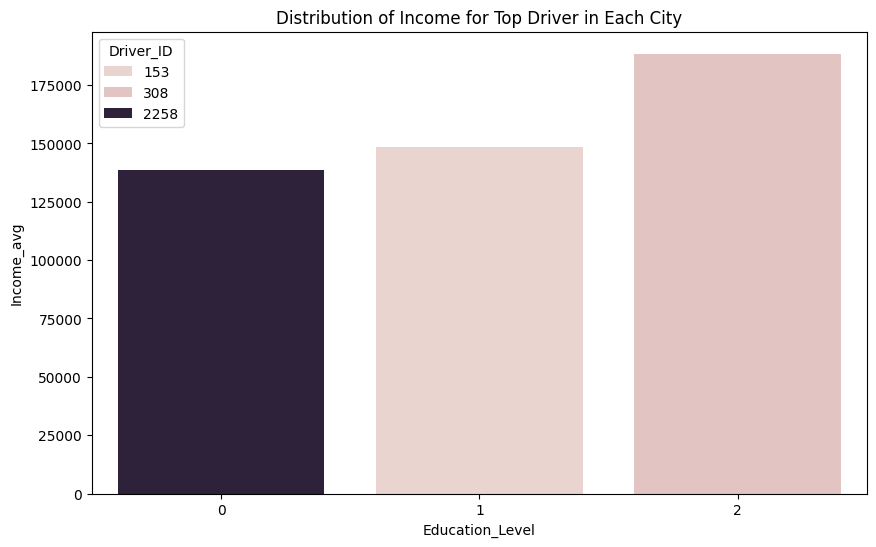

In [47]:
# Identify the top driver in each city based on income
top_drivers = df.groupby('Education_Level')['Driver_ID'].apply(lambda x: x[df.loc[x.index]['Income_avg'].idxmax()])

# Plot the distribution of income for the top driver in each city
plt.figure(figsize=(10, 6))
sns.barplot(x='Education_Level', y='Income_avg', hue="Driver_ID", data=df[df['Driver_ID'].isin(top_drivers)])
plt.title('Distribution of Income for Top Driver in Each City')
plt.show()

In [48]:
df.drop(["Driver_ID"], axis=1, inplace=True)
df.to_csv("dataset/phase1_df.csv", index=False)